<a href="https://colab.research.google.com/github/a00839600-cloud/Avance-1/blob/main/Avance_1_MACD_y_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pandas numpy matplotlib yfinance ta

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta # Technical Analysis library

# Define the tickers
tickers = ["AAPL", "NVDA"]

# Fetch data for the tickers
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")

# Calculate MACD and RSI for each ticker
for ticker in tickers:
    # Get the closing price for the ticker
    close_prices = data['Close'][ticker].dropna()

    if not close_prices.empty:
        # Calculate MACD
        macd = ta.trend.MACD(close_prices)
        data[('MACD', ticker)] = macd.macd()
        data[('MACD_Signal', ticker)] = macd.macd_signal()

        # Calculate RSI
        rsi_calculator = ta.momentum.RSIIndicator(close_prices)
        data[('RSI', ticker)] = rsi_calculator.rsi()
    else:
        data[('MACD', ticker)] = np.nan
        data[('MACD_Signal', ticker)] = np.nan
        data[('RSI', ticker)] = np.nan


# Display the data with MACD and RSI
display(data)

/tmp/ipython-input-293090612.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  2 of 2 completed


Price            Close                   High                    Low  \
Ticker            AAPL       NVDA        AAPL       NVDA        AAPL   
Date                                                                   
2023-01-03  123.330643  14.301479  129.079559  14.981837  122.443158   
2023-01-04  124.602722  14.735071  126.870739  14.838973  123.340524   
2023-01-05  123.281349  14.251527  125.993105  14.550244  123.024970   
2023-01-06  127.817360  14.844964  128.478040  14.995821  123.153145   
2023-01-09  128.339996  15.613241  131.554669  16.040836  128.083618   
...                ...        ...         ...        ...         ...   
2023-12-22  191.974686  48.805531  193.769488  49.358251  191.349970   
2023-12-26  191.429291  49.254303  192.262235  49.575141  191.211137   
2023-12-27  191.528458  49.392235  191.875525  49.655103  189.485754   
2023-12-28  191.954849  49.497181  193.025784  49.858999  191.548288   
2023-12-29  190.913666  49.497181  192.767962  49.971945  190.120379   

Price                        Open                Volume                 MACD  \
Ticker           NVDA        AAPL       NVDA       AAPL       NVDA      AAPL   
Date                                                                           
2023-01-03  14.082686  128.468186  14.836973  112117500  401277000       NaN   
2023-01-04  14.227551  125.125350  14.553244   89113600  431324000       NaN   
2023-01-05  14.134637  125.362006  14.477313   80962700  389168000       NaN   
2023-01-06  14.020744  124.257571  14.460327   87754700  405044000       NaN   
2023-01-09  15.126701  128.655553  15.269566   70790800  504231000       NaN   
...               ...         ...        ...        ...        ...       ...   
2023-12-22  48.442710  193.541408  49.170345   37149600  252507000  2.635695   
2023-12-26  48.935463  191.984587  48.943458   28919300  244200000  2.306986   
2023-12-27  49.060400  190.874010  49.486189   48087700  233648000  2.031071   
2023-12-28  49.387235  192.510145  49.618122   34049900  246587000  1.825766   
2023-12-29  48.726567  192.272159  49.788035   42672100  389293000  1.561051   

Price      MACD_Signal        RSI      MACD MACD_Signal        RSI  
Ticker            AAPL       AAPL      NVDA        NVDA       NVDA  
Date                                                                
2023-01-03         NaN        NaN       NaN         NaN        NaN  
2023-01-04         NaN        NaN       NaN         NaN        NaN  
2023-01-05         NaN        NaN       NaN         NaN        NaN  
2023-01-06         NaN        NaN       NaN         NaN        NaN  
2023-01-09         NaN        NaN       NaN         NaN        NaN  
...                ...        ...       ...         ...        ...  
2023-12-22    3.238392  54.672824  0.634352    0.564438  55.352130  
2023-12-26    3.052111  53.090024  0.655690    0.582688  57.245978  
2023-12-27    2.847903  53.354451  0.675938    0.601338  57.837933  
2023-12-28    2.643475  54.541001  0.692471    0.619565  58.310890  
2023-12-29    2.426991  51.121351  0.697532    0.635158  58.310890  

[250 rows x 16 columns]

Here's a plot showing the closing price along with MACD and RSI for each ticker.

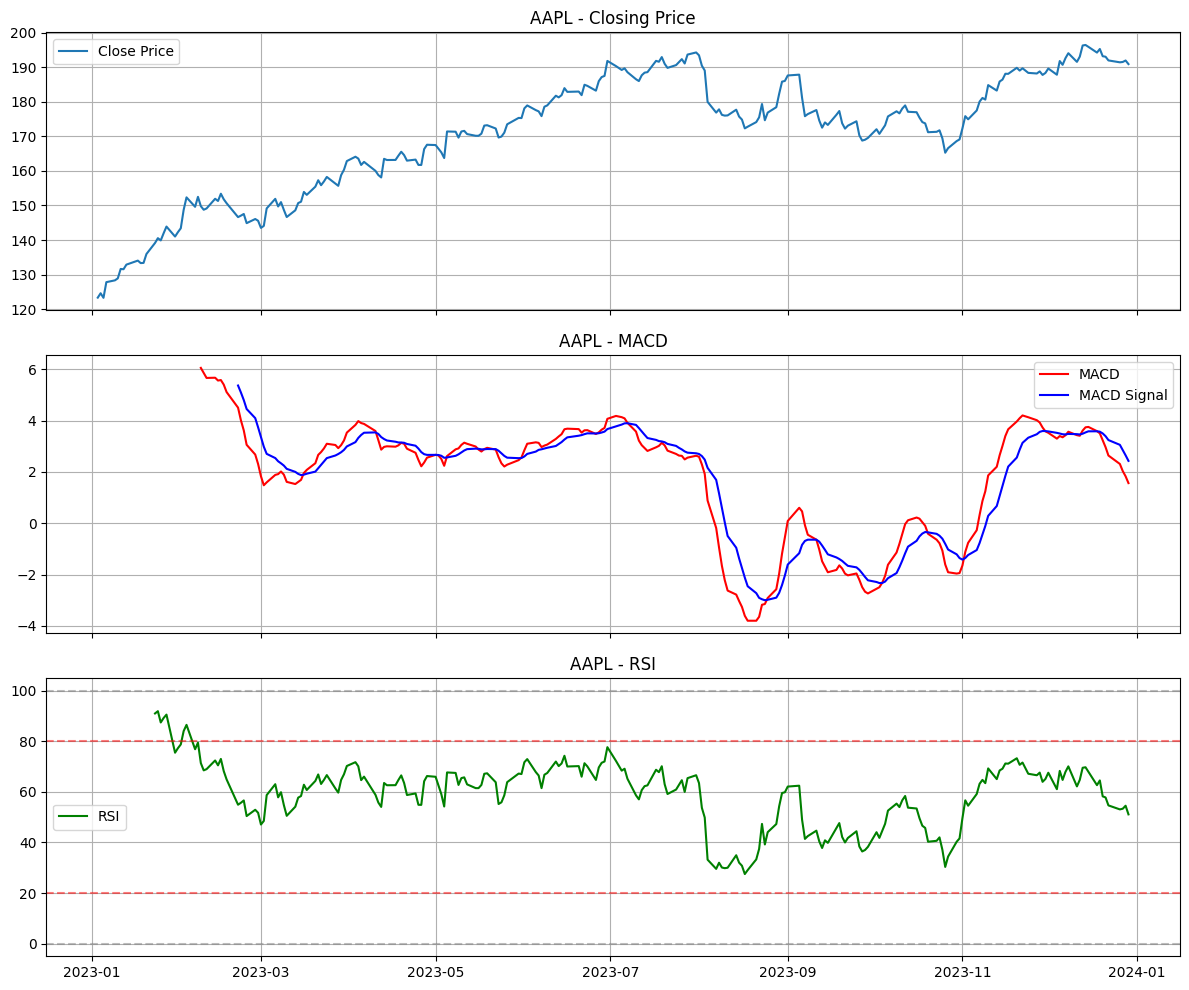

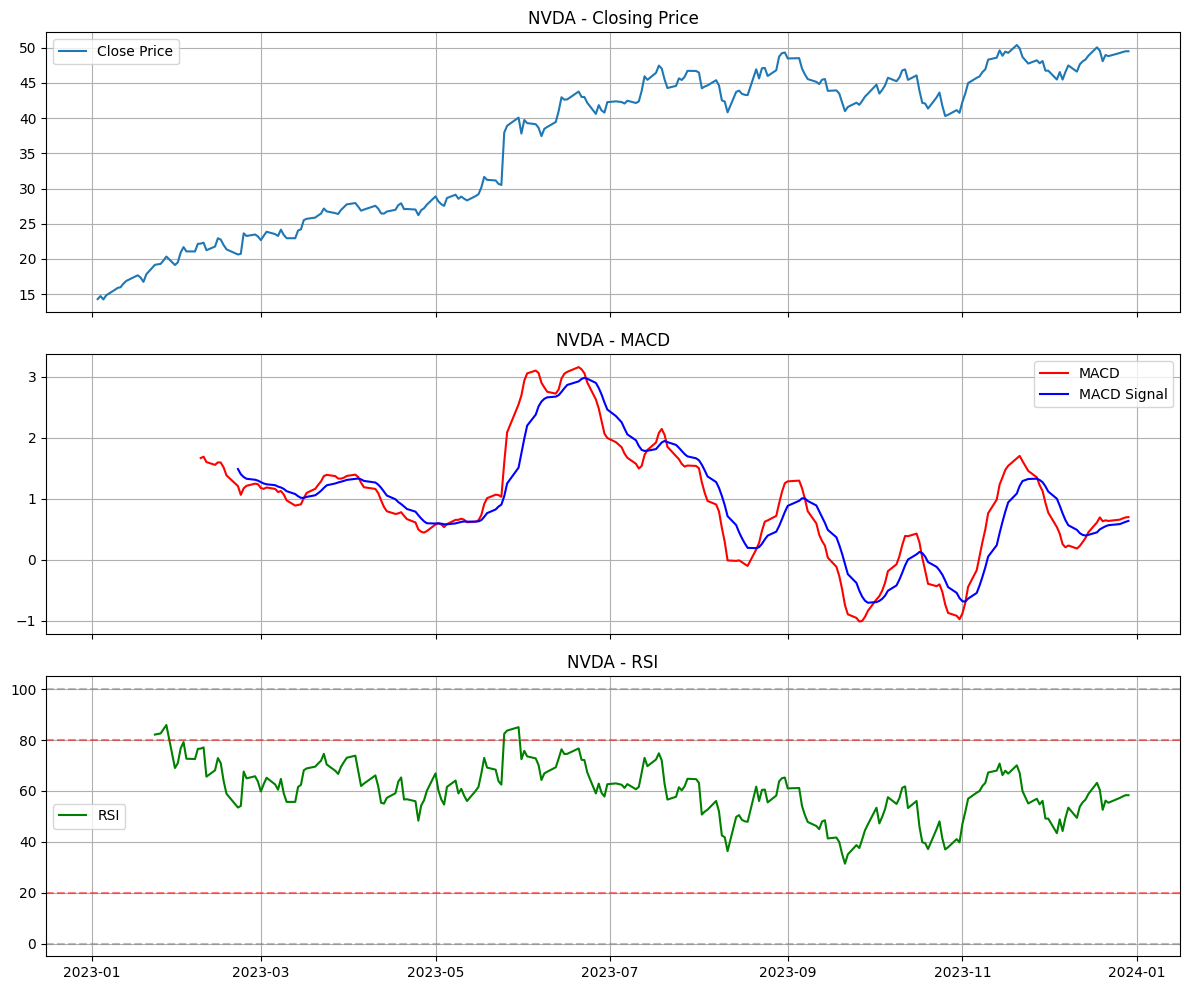

In [11]:
for ticker in tickers:
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    # Plot Closing Price
    axes[0].plot(data['Close'][ticker], label='Close Price')
    axes[0].set_title(f'{ticker} - Closing Price')
    axes[0].legend()
    axes[0].grid(True)

    # Plot MACD
    axes[1].plot(data['MACD'][ticker], label='MACD', color='red')
    axes[1].plot(data['MACD_Signal'][ticker], label='MACD Signal', color='blue')
    axes[1].set_title(f'{ticker} - MACD')
    axes[1].legend()
    axes[1].grid(True)

    # Plot RSI
    axes[2].plot(data['RSI'][ticker], label='RSI', color='green')
    axes[2].axhline(0, linestyle='--', alpha=0.5, color='gray')
    axes[2].axhline(20, linestyle='--', alpha=0.5, color='red')
    axes[2].axhline(80, linestyle='--', alpha=0.5, color='red')
    axes[2].axhline(100, linestyle='--', alpha=0.5, color='gray')
    axes[2].set_title(f'{ticker} - RSI')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()